In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
data = pd.read_pickle('data.pkl')

In [3]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,cosmetics,dire_score,dire_team_id,draft_timings,duration,engine,first_blood_time,game_mode,human_players,leagueid,lobby_type,match_seq_num,negative_votes,objectives,picks_bans,positive_votes,radiant_gold_adv,radiant_score,radiant_team_id,radiant_win,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,version,replay_salt,series_id,series_type,players,patch,region,replay_url,all_word_counts,my_word_counts,throw,loss,comeback,stomp,player_slot,hero,rad_dir,my_win,stats_dict,abandons,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,actions_per_min,additional_units,ancient_kills,assists,backpack_0,backpack_1,backpack_2,backpack_3,benchmarks,buyback_count,buyback_log,camps_stacked,connection_log,courier_kills,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,dn_t,first_purchase_time,firstblood_claimed,gold,gold_per_min,gold_reasons,gold_spent,gold_t,hero_damage,hero_healing,hero_hits,hero_id,hero_kills,isRadiant,is_contributor,is_roaming,is_subscriber,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_usage,item_uses,item_win,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_pos,lane_role,last_hits,last_login,leaver_status,level,lh_t,life_state,life_state_dead,lose,max_hero_hit,multi_kills,name_x,necronomicon_kills,net_worth,neutral_kills,obs,obs_left_log,obs_log,obs_placed,observer_kills,observer_uses,party_id,party_size,performance_others,permanent_buffs,personaname,pings,pred_vict,purchase,purchase_gem,purchase_log,purchase_time,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,randomed,rank_tier,repicked,roshan_kills,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,tower_kills,towers_killed,win,xp_per_min,xp_reasons,xp_t,average_rank,id,name_y,localized_name,primary_attr,attack_type,roles,img,icon,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,turbo_picks,turbo_wins,pro_ban,pro_win,pro_pick,1_pick,1_win,2_pick,2_win,3_pick,3_win,4_pick,4_win,5_pick,5_win,6_pick,6_win,7_pick,7_win,8_pick,8_win,null_pick,null_win
0,7150274721,3,63,None,117,None,9,NaN,None,1621,1,0,22,10,0,7,6008075266,0,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",0,None,39,NaN,True,None,NaN,1683851172,None,6,2047,NaN,117284662.00,0.00,0.00,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,http://replay117.valve.net/570/7150274721_1172...,NaN,NaN,NaN,NaN,NaN,NaN,130,Medusa,Dire,False,"{'match_id': 7150274721, 'player_slot': 130, '...",0,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,190040093,None,NaN,None,NaN,1,0,0,0,NaN,"{'gold_per_min': {'raw': 372, 'pct': 0.1492537...",NaN,None,NaN,None,NaN,NaN,None,None,None,None,None,3,4,None,NaN,NaN,1094.00,372,None,9175.00,None,12985.00,0.00,None,94,NaN,False,False,NaN,False,88,236,36,63,0,147,288.00,NaN,None,NaN,0,None,None,None,1,None,0.04,NaN,NaN,NaN,NaN,None,NaN,209,None,0,14,None,None,NaN,1,None,None,None,NaN,9869.00,NaN,None,None,None,NaN,NaN,NaN,7.00,1.00,None,[],a_fat,NaN,None,None,NaN,None,NaN,NaN,NaN,NaN,None,34,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,10050,11157,0.00,NaN,NaN,0,413,None,None,33.00,94,npc_dota_hero_medusa,Medusa,agi,Ranged,"[Carry, Disabler, Durable]",/apps/dota2/images/dota_react/heroes/medusa.png?,/apps/dota2/images/dota_react/heroes/icons/med...,120,0.25,75,0.00,-1.00,25,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,NaN,True,0,1800,800,310638,196238,402,122,228,4949,2644,22254,12453,43913,25392,444

In [4]:
data.shape

(5382, 235)

In [5]:
# dropping a lot of columns with nan. Some of them due to data being not tracked or incomplete.

data.isna().sum()

match_id                        0
barracks_status_dire            0
barracks_status_radiant         0
chat                         4971
cluster                         0
cosmetics                    4971
dire_score                      0
dire_team_id                 5376
draft_timings                5022
duration                        0
engine                          0
first_blood_time                0
game_mode                       0
human_players                   0
leagueid                        0
lobby_type                      0
match_seq_num                   0
negative_votes                  0
objectives                   4971
picks_bans                   1001
positive_votes                  0
radiant_gold_adv             4971
radiant_score                   0
radiant_team_id              5376
radiant_win                     0
radiant_xp_adv               4971
skill                        2443
start_time                      0
teamfights                   4971
tower_status_d

In [6]:
data.drop(data.loc[:, 'turbo_picks':'null_win'], axis = 1, inplace = True)

In [7]:
data.drop(['hero_hits', 'additional_units', 'img', 'icon', 'name_y', 'xp_reasons', 'xp_t', 'win', 'randomed', 'personaname', 'pings', 'necronomicon_kills', 'name_x', 'life_state_dead', 'life_state', 'lh_t', 'last_login', 'is_subscriber', 'is_contributor', 'gold_t', 'gold_reasons', 'dn_t', 'connection_log', 'backpack_3'], axis = 1, inplace = True)

In [8]:
data.drop(data.loc[:, 'version':'series_type'], axis = 1, inplace = True)

In [9]:
data.drop(data.loc[:, 'replay_url':'stomp'], axis = 1, inplace = True)

In [10]:
data.drop(['benchmarks', 'localized_name', 'stats_dict', 'cosmetics', 'engine', 'match_seq_num', 'negative_votes', 'positive_votes', 'radiant_team_id', 'radiant_win', 'dire_team_id'], axis = 1, inplace = True)

In [11]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,human_players,leagueid,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,skill,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,account_id,actions,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,buyback_log,camps_stacked,courier_kills,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,first_purchase_time,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,hero_kills,isRadiant,is_roaming,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_usage,item_uses,item_win,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_pos,lane_role,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,neutral_kills,obs,obs_left_log,obs_log,obs_placed,observer_kills,observer_uses,party_id,party_size,performance_others,permanent_buffs,pred_vict,purchase,purchase_gem,purchase_log,purchase_time,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,rank_tier,repicked,roshan_kills,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,tower_kills,towers_killed,xp_per_min,average_rank,id,primary_attr,attack_type,roles,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7150274721,3,63,None,117,9,None,1621,0,22,10,0,7,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",None,39,None,NaN,1683851172,None,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,False,0,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,190040093,None,NaN,NaN,1,0,0,0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,3,4,NaN,NaN,1094.00,372,9175.00,12985.00,0.00,94,NaN,False,NaN,88,236,36,63,0,147,288.00,NaN,None,NaN,0,None,None,None,1,None,0.04,NaN,NaN,NaN,NaN,None,NaN,209,0,14,1,None,None,9869.00,NaN,None,None,None,NaN,NaN,NaN,7.00,1.00,None,[],None,None,NaN,None,NaN,NaN,NaN,NaN,34,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,10050,11157,0.00,NaN,NaN,413,33.00,94,agi,Ranged,"[Carry, Disabler, Durable]",120,0.25,75,0.00,-1.00,25,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,NaN,True,0,1800,800
1,7150256183,51,63,None,117,15,None,1764,17,22,10,0,7,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",None,43,None,NaN,1683848869,None,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,False,0,None,"[5065, 5068, 5066, 5068, 5065, 5067, 5068, 506...",None,190040093,None,NaN,NaN,5,0,0,0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,5,7,NaN,NaN,513.00,393,11085.00,9828.00,0.00,12,NaN,False,NaN,174,75,63,61,36,147,331.00,NaN,None,NaN,1,None,None,None,1,None,0.03,NaN,NaN,NaN,NaN,None,NaN,168,0,16,1,None,None,10968.00,NaN,None,None,None,NaN,NaN,NaN,6.00,1.00,None,[],None,None,NaN,None,NaN,NaN,NaN,NaN,34,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,11554,14494,13.00,NaN,NaN,493,34.00,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",120,2.00,75,0.00,-1.00,25,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,NaN,True,2,1800,800
2,7150214339,3,63,None,117,42,None,3274,24,22,10,0,7,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",None,43,None,NaN,1683844129,None,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,None,"[5334, 5336, 5334, 5336, 5335, 5337, 5334, 533.

In [12]:
# Cleaned up data a bit by dropping irrelevant columns

data.shape

(5382, 166)

In [13]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,human_players,leagueid,lobby_type,radiant_score,skill,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,account_id,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,camps_stacked,courier_kills,creeps_stacked,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,hero_kills,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_role,last_hits,leaver_status,level,lose,net_worth,neutral_kills,obs_placed,observer_kills,observer_uses,party_id,party_size,purchase_gem,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,rank_tier,roshan_kills,roshans_killed,rune_pickups,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,total_gold,total_xp,tower_damage,tower_kills,towers_killed,xp_per_min,average_rank,id,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision
count,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,2939.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,391.00,391.00,5382.00,5382.00,5382.00,5382.00,391.00,391.00,391.00,391.00,5382.00,5382.00,370.00,798.00,5382.00,798.00,798.00,798.00,5382.00,391.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5165.00,5382.00,5382.00,5255.00,391.00,390.00,390.00,391.00,391.00,5382.00,5382.00,5382.00,5382.00,5107.00,391.00,391.00,391.00,391.00,767.00,745.00,11.00,369.00,117.00,131.00,5382.00,391.00,370.00,391.00,391.00,391.00,391.00,391.00,370.00,5382.00,5382.00,798.00,391.00,370.00,5382.00,747.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,1540.00,5382.00,5382.00,5382.00
mean,5160228771.16,36.79,36.72,120.77,38.84,2587.07,106.55,20.81,10.00,0.00,5.75,38.78,1.00,1583726077.60,936.71,1009.23,40.98,1.77,65.68,0.00,190040093.00,147.18,6.52,12.50,33.62,19.81,17.27,0.52,0.33,0.04,0.67,7.04,6.98,0.08,1888.16,428.66,15749.12,23486.24,1164.47,43.20,7.38,116.12,131.37,124.38,110.75,100.39,133.98,227.57,3.02,7.93,0.19,1.93,0.49,48.14,108.98,1.80,177.27,0.03,22.08,0.51,16513.03,52.79,1.58,0.57,0.87,4.03,1.21,1.18,5.99,5.61,7.70,34.00,0.16,0.16,5.10,2.33,0.86,1.15,20.55,0.51,18808.17,24731.41,3126.26,1.18,1.17,562.86,24.93,43.20,120.00,0.83,75.54,0.08,0.45,25.00,27.42,32.82,20.22,21.20,17.70,2.42,2.47,2.02,310.82,917.38,1.66,103.15,0.40,297.70,0.78,1.96,1799.81,836.45
std,1254701996.04,28.18,29.03,6.00,15.08,621.25,100.84,4.84,0.00,0.00,2.68,13.87,0.00,58975481.10,922.53,932.41,9.39,0.68,64.02,0.05,0.00,22.47,8.59,6.46,115.55,83.16,86.33,0.69,0.67,0.22,1.52,3.63,5.89,0.27,1615.70,120.24,6623.53,15094.57,2731.16,35.54,5.40,121.17,118.93,94.58,85.50,101.35,139.62,255.75,3.37,5.28,0.11,0.95,0.13,12.56,62.55,0.93,105.78,0.21,4.35,0.50,7009.58,49.17,3.42,1.08,1.85,2.81,0.55,0.40,3.43,4.81,6.99,0.00,0.39,0.40,3.87,4.98,1.70,2.68,31.98,0.14,7772.39,9526.74,3976.54,1.37,1.37,148.96,5.56,35.54,0.00,0.64,4.92,0.20,1.29,0.00,8.16,8.96,3.80,6.87,3.93,0.59,0.82,0.75,190.01,627.15,0.12,7.90,0.10,13.15,0.09,0.87,13.63,155.91
min,2801482629.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,10.00,0.00,0.00,2.00,1.00,1480060797.00,0.00,0.00,18.00,1.00,0.00,0.00,190040093.00,67.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,1185.00,1568.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00,0.22,22.00,2.00,1.00,1.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,34.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,1380.00,1204.00,0.00,0.0

In [14]:
data.describe().T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
human_players,5382.00,10.00,0.00,10.00,10.00,10.00,10.00,10.00
base_health,5382.00,120.00,0.00,120.00,120.00,120.00,120.00,120.00
skill,2939.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
base_mr,5382.00,25.00,0.00,25.00,25.00,25.00,25.00,25.00
account_id,5382.00,190040093.00,0.00,190040093.00,190040093.00,190040093.00,190040093.00,190040093.00
rank_tier,5382.00,34.00,0.00,34.00,34.00,34.00,34.00,34.00
leagueid,5382.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
abandons,5382.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
turn_rate,1540.00,0.78,0.09,0.60,0.70,0.80,0.90,0.90
attack_point,5382.00,0.40,0.10,0.17,0.30,0.40,0.50,0.65


In [15]:
# Dropping more columns

data.drop(['human_players', 'base_health', 'skill', 'base_mr', 'account_id', 'rank_tier', 'leagueid', ], axis = 1, inplace = True)

In [16]:
# There are a few columns below the 5382 matches. How many columns do we have now?

In [17]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,actions,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,buyback_log,camps_stacked,courier_kills,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,first_purchase_time,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,hero_kills,isRadiant,is_roaming,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_usage,item_uses,item_win,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_pos,lane_role,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,neutral_kills,obs,obs_left_log,obs_log,obs_placed,observer_kills,observer_uses,party_id,party_size,performance_others,permanent_buffs,pred_vict,purchase,purchase_gem,purchase_log,purchase_time,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,repicked,roshan_kills,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,tower_kills,towers_killed,xp_per_min,average_rank,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7150274721,3,63,None,117,9,None,1621,0,22,7,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",None,39,None,1683851172,None,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,False,0,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,None,NaN,NaN,1,0,0,0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,3,4,NaN,NaN,1094.00,372,9175.00,12985.00,0.00,94,NaN,False,NaN,88,236,36,63,0,147,288.00,NaN,None,NaN,0,None,None,None,1,None,0.04,NaN,NaN,NaN,NaN,None,NaN,209,0,14,1,None,None,9869.00,NaN,None,None,None,NaN,NaN,NaN,7.00,1.00,None,[],None,None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,10050,11157,0.00,NaN,NaN,413,33.00,94,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,NaN,True,0,1800,800
1,7150256183,51,63,None,117,15,None,1764,17,22,7,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",None,43,None,1683848869,None,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,False,0,None,"[5065, 5068, 5066, 5068, 5065, 5067, 5068, 506...",None,None,NaN,NaN,5,0,0,0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,5,7,NaN,NaN,513.00,393,11085.00,9828.00,0.00,12,NaN,False,NaN,174,75,63,61,36,147,331.00,NaN,None,NaN,1,None,None,None,1,None,0.03,NaN,NaN,NaN,NaN,None,NaN,168,0,16,1,None,None,10968.00,NaN,None,None,None,NaN,NaN,NaN,6.00,1.00,None,[],None,None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,11554,14494,13.00,NaN,NaN,493,34.00,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,NaN,True,2,1800,800
2,7150214339,3,63,None,117,42,None,3274,24,22,7,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",None,43,None,1683844129,None,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,None,"[5334, 5336, 5334, 5336, 5335, 5337, 5334, 533...",None,None,NaN,NaN,10,0,0,4204,NaN,None,NaN,NaN,NaN,None,None,None,None,None,4,9,NaN,NaN,353.00,593,30445.00,56927.00,0.00,67,NaN,Fals

In [18]:
data.shape

(5382, 159)

In [19]:
data.dtypes

match_id                       int64
barracks_status_dire           int64
barracks_status_radiant        int64
chat                          object
cluster                        int64
dire_score                     int64
draft_timings                 object
duration                       int64
first_blood_time               int64
game_mode                      int64
lobby_type                     int64
objectives                    object
picks_bans                    object
radiant_gold_adv              object
radiant_score                  int64
radiant_xp_adv                object
start_time                     int64
teamfights                    object
tower_status_dire              int64
tower_status_radiant           int64
players                       object
patch                          int64
region                         int64
player_slot                    int64
hero                          object
rad_dir                       object
my_win                          bool
a

In [20]:
# https://github.com/odota/dotaconstants/blob/master/json/game_mode.json
# 22 All Draft
# 1 All pick
# 2 Captains Mode
# 3 Random Draft
# 4 Single Draft
# We will exclude modes 2 - 4

data.game_mode.value_counts()

22    5072
1      278
4       24
2        7
3        1
Name: game_mode, dtype: int64

In [21]:
# https://github.com/odota/dotaconstants/blob/master/json/lobby_type.json
# 7 ranked
# 0 unranked
# 9 battlecup

data.lobby_type.value_counts()

7    4414
0     962
9       6
Name: lobby_type, dtype: int64

In [22]:
# https://github.com/odota/dotaconstants/blob/master/build/region.json
# 2 US East
# 1 US West
# 3 Europe (when I was in Barcelona)
# 9 Austria (when I was in Barcelona?)

data.region.value_counts()

2    3839
1    1468
3      49
9      26
Name: region, dtype: int64

In [23]:
# https://github.com/odota/dotaconstants/blob/master/json/patch.json

data.patch.value_counts()

50    579
51    525
47    468
40    369
25    339
41    323
49    316
39    254
44    250
46    230
45    215
42    192
26    163
20    151
21    137
37    114
43     86
52     83
38     79
48     66
35     59
30     57
31     56
28     50
32     37
24     37
29     32
34     28
27     24
33     19
23     19
22      8
18      7
19      6
36      4
Name: patch, dtype: int64

In [24]:
# I am not sure what the clusters represent :(

data.cluster.value_counts()

121    1399
123    1255
122    1185
117     740
118     374
111     202
112     152
191      11
192       9
138       8
136       7
135       7
137       6
134       6
193       6
133       6
131       5
132       4
Name: cluster, dtype: int64

In [25]:
# Idk if this will be used as features, it'll be highly correlated to our target

data.barracks_status_dire.value_counts()

63    2129
0     1514
51     701
3      338
48     307
60      60
15      60
16      41
55      36
19      32
1       29
31      19
12      17
49      17
61      14
52      12
59      11
2        9
50       5
13       5
7        5
35       4
23       3
4        3
28       3
11       2
29       1
8        1
56       1
6        1
17       1
32       1
Name: barracks_status_dire, dtype: int64

In [26]:
# Idk if this will be used as features, it'll be highly correlated to our target

data.barracks_status_radiant.value_counts()

63    2432
0     1623
51     464
3      356
48     210
15      65
60      40
55      26
16      22
19      18
12      16
52      13
59      13
2       13
31      12
49       9
1        8
61       8
50       7
47       6
7        6
35       3
62       2
17       2
28       1
5        1
4        1
8        1
42       1
13       1
56       1
14       1
Name: barracks_status_radiant, dtype: int64

In [27]:
# Target

data.my_win.value_counts()

False    2729
True     2653
Name: my_win, dtype: int64

In [28]:
data.hero.value_counts()

Juggernaut             645
Drow Ranger            324
Weaver                 275
Phantom Lancer         240
Monkey King            235
Spectre                220
Sniper                 198
Faceless Void          193
Phantom Assassin       182
Axe                    152
Tiny                   147
Legion Commander       143
Bloodseeker            129
Lion                   118
Bristleback            112
Razor                   95
Mirana                  95
Shadow Shaman           88
Wraith King             84
Ember Spirit            83
Nature's Prophet        79
Medusa                  70
Bounty Hunter           67
Anti-Mage               65
Ogre Magi               65
Witch Doctor            64
Zeus                    63
Slark                   63
Viper                   61
Gyrocopter              56
Lifestealer             54
Underlord               54
Riki                    53
Disruptor               49
Earthshaker             46
Dazzle                  41
Storm Spirit            41
H

In [29]:
# f,ax = plt.subplots(figsize=(15, 15))
# cols = data.corr()['my_win'].index
# cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.show()

In [30]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,actions,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,buyback_log,camps_stacked,courier_kills,creeps_stacked,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,first_purchase_time,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,hero_kills,isRadiant,is_roaming,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_usage,item_uses,item_win,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_pos,lane_role,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,neutral_kills,obs,obs_left_log,obs_log,obs_placed,observer_kills,observer_uses,party_id,party_size,performance_others,permanent_buffs,pred_vict,purchase,purchase_gem,purchase_log,purchase_time,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,repicked,roshan_kills,roshans_killed,rune_pickups,runes,runes_log,sen,sen_left_log,sen_log,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,times,total_gold,total_xp,tower_damage,tower_kills,towers_killed,xp_per_min,average_rank,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7150274721,3,63,None,117,9,None,1621,0,22,7,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",None,39,None,1683851172,None,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,False,0,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,None,NaN,NaN,1,0,0,0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,3,4,NaN,NaN,1094.00,372,9175.00,12985.00,0.00,94,NaN,False,NaN,88,236,36,63,0,147,288.00,NaN,None,NaN,0,None,None,None,1,None,0.04,NaN,NaN,NaN,NaN,None,NaN,209,0,14,1,None,None,9869.00,NaN,None,None,None,NaN,NaN,NaN,7.00,1.00,None,[],None,None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,10050,11157,0.00,NaN,NaN,413,33.00,94,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,NaN,True,0,1800,800
1,7150256183,51,63,None,117,15,None,1764,17,22,7,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",None,43,None,1683848869,None,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,False,0,None,"[5065, 5068, 5066, 5068, 5065, 5067, 5068, 506...",None,None,NaN,NaN,5,0,0,0,NaN,None,NaN,NaN,NaN,None,None,None,None,None,5,7,NaN,NaN,513.00,393,11085.00,9828.00,0.00,12,NaN,False,NaN,174,75,63,61,36,147,331.00,NaN,None,NaN,1,None,None,None,1,None,0.03,NaN,NaN,NaN,NaN,None,NaN,168,0,16,1,None,None,10968.00,NaN,None,None,None,NaN,NaN,NaN,6.00,1.00,None,[],None,None,NaN,None,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,None,11554,14494,13.00,NaN,NaN,493,34.00,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,NaN,True,2,1800,800
2,7150214339,3,63,None,117,42,None,3274,24,22,7,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",None,43,None,1683844129,None,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,None,"[5334, 5336, 5334, 5336, 5335, 5337, 5334, 533...",None,None,NaN,NaN,10,0,0,4204,NaN,None,NaN,NaN,NaN,None,None,None,None,None,4,9,NaN,NaN,353.00,593,30445.00,56927.00,0.00,67,NaN,Fals

In [31]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,radiant_score,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,actions_per_min,ancient_kills,assists,backpack_0,backpack_1,backpack_2,buyback_count,camps_stacked,courier_kills,creeps_stacked,deaths,denies,firstblood_claimed,gold,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,hero_kills,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,lane,lane_efficiency,lane_efficiency_pct,lane_kills,lane_role,last_hits,leaver_status,level,lose,net_worth,neutral_kills,obs_placed,observer_kills,observer_uses,party_id,party_size,purchase_gem,purchase_tpscroll,purchase_ward_observer,purchase_ward_sentry,roshan_kills,roshans_killed,rune_pickups,sen_placed,sentry_kills,sentry_uses,stuns,teamfight_participation,total_gold,total_xp,tower_damage,tower_kills,towers_killed,xp_per_min,average_rank,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision
count,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,391.00,391.00,5382.00,5382.00,5382.00,5382.00,391.00,391.00,391.00,391.00,5382.00,5382.00,370.00,798.00,5382.00,798.00,798.00,798.00,5382.00,391.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5165.00,5382.00,5382.00,5255.00,391.00,390.00,390.00,391.00,391.00,5382.00,5382.00,5382.00,5382.00,5107.00,391.00,391.00,391.00,391.00,767.00,745.00,11.00,369.00,117.00,131.00,391.00,370.00,391.00,391.00,391.00,391.00,391.00,370.00,5382.00,5382.00,798.00,391.00,370.00,5382.00,747.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,1540.00,5382.00,5382.00,5382.00
mean,5160228771.16,36.79,36.72,120.77,38.84,2587.07,106.55,20.81,5.75,38.78,1583726077.60,936.71,1009.23,40.98,1.77,65.68,0.00,147.18,6.52,12.50,33.62,19.81,17.27,0.52,0.33,0.04,0.67,7.04,6.98,0.08,1888.16,428.66,15749.12,23486.24,1164.47,43.20,7.38,116.12,131.37,124.38,110.75,100.39,133.98,227.57,3.02,7.93,0.19,1.93,0.49,48.14,108.98,1.80,177.27,0.03,22.08,0.51,16513.03,52.79,1.58,0.57,0.87,4.03,1.21,1.18,5.99,5.61,7.70,0.16,0.16,5.10,2.33,0.86,1.15,20.55,0.51,18808.17,24731.41,3126.26,1.18,1.17,562.86,24.93,43.20,0.83,75.54,0.08,0.45,27.42,32.82,20.22,21.20,17.70,2.42,2.47,2.02,310.82,917.38,1.66,103.15,0.40,297.70,0.78,1.96,1799.81,836.45
std,1254701996.04,28.18,29.03,6.00,15.08,621.25,100.84,4.84,2.68,13.87,58975481.10,922.53,932.41,9.39,0.68,64.02,0.05,22.47,8.59,6.46,115.55,83.16,86.33,0.69,0.67,0.22,1.52,3.63,5.89,0.27,1615.70,120.24,6623.53,15094.57,2731.16,35.54,5.40,121.17,118.93,94.58,85.50,101.35,139.62,255.75,3.37,5.28,0.11,0.95,0.13,12.56,62.55,0.93,105.78,0.21,4.35,0.50,7009.58,49.17,3.42,1.08,1.85,2.81,0.55,0.40,3.43,4.81,6.99,0.39,0.40,3.87,4.98,1.70,2.68,31.98,0.14,7772.39,9526.74,3976.54,1.37,1.37,148.96,5.56,35.54,0.64,4.92,0.20,1.29,8.16,8.96,3.80,6.87,3.93,0.59,0.82,0.75,190.01,627.15,0.12,7.90,0.10,13.15,0.09,0.87,13.63,155.91
min,2801482629.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,0.00,2.00,1480060797.00,0.00,0.00,18.00,1.00,0.00,0.00,67.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,1185.00,1568.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00,0.22,22.00,2.00,1.00,1.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,1380.00,1204.00,0.00,0.00,0.00,55.00,13.00,1.00,0.25,75.00,0.00,-3.00,6.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,1.40,90.00,0.17,275.00,0.60,0.00,800.00,800.00
25%,4031830600.50,0.00,0.00,118.00,28.00,2151.00,16.00,22.00,7.00,29.00,1532895111.75,0.00,0.00,37

In [32]:
data.drop(['creeps_stacked', 'actions_per_min', 'ancient_kills', 'buyback_count', 'camps_stacked', 'courier_kills', 'firstblood_claimed', 'gold', 'gold_spent', 'hero_damage', 'hero_healing', 'hero_kills', 'lane', 'lane_efficiency', 'lane_efficiency_pct', 'lane_kills', 'lane_role', 'neutral_kills', 'average_rank', 'towers_killed', 'tower_kills', 'tower_damage'], axis = 1, inplace = True)

In [33]:
data.drop(data.loc[:, 'obs_placed':'teamfight_participation'], axis = 1, inplace = True)

In [34]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,chat,cluster,dire_score,draft_timings,duration,first_blood_time,game_mode,lobby_type,objectives,picks_bans,radiant_gold_adv,radiant_score,radiant_xp_adv,start_time,teamfights,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,ability_targets,ability_upgrades_arr,ability_uses,actions,assists,backpack_0,backpack_1,backpack_2,buyback_log,damage,damage_inflictor,damage_inflictor_received,damage_taken,damage_targets,deaths,denies,first_purchase_time,gold_per_min,hero_id,isRadiant,is_roaming,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,item_usage,item_uses,item_win,kda,kill_streaks,killed,killed_by,kills,kills_log,kills_per_min,lane_pos,last_hits,leaver_status,level,lose,max_hero_hit,multi_kills,net_worth,obs,obs_left_log,obs_log,times,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7150274721,3,63,None,117,9,None,1621,0,22,7,None,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",None,39,None,1683851172,None,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,False,0,None,"[5505, 5504, 5505, 5506, 5504, 5507, 5505, 550...",None,None,1,0,0,0,None,None,None,None,None,None,3,4,NaN,372,94,False,NaN,88,236,36,63,0,147,288.00,NaN,None,NaN,0,None,None,None,1,None,0.04,None,209,0,14,1,None,None,9869.00,None,None,None,None,10050,11157,413,94,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,NaN,True,0,1800,800
1,7150256183,51,63,None,117,15,None,1764,17,22,7,None,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",None,43,None,1683848869,None,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,False,0,None,"[5065, 5068, 5066, 5068, 5065, 5067, 5068, 506...",None,None,5,0,0,0,None,None,None,None,None,None,5,7,NaN,393,12,False,NaN,174,75,63,61,36,147,331.00,NaN,None,NaN,1,None,None,None,1,None,0.03,None,168,0,16,1,None,None,10968.00,None,None,None,None,11554,14494,493,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,NaN,True,2,1800,800
2,7150214339,3,63,None,117,42,None,3274,24,22,7,None,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",None,43,None,1683844129,None,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,None,"[5334, 5336, 5334, 5336, 5335, 5337, 5334, 533...",None,None,10,0,0,4204,None,None,None,None,None,None,4,9,NaN,593,67,False,NaN,137,208,40,160,63,147,362.00,NaN,None,NaN,5,None,None,None,15,None,0.27,None,396,0,27,1,None,None,29983.00,None,None,None,None,32358,44199,810,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,NaN,True,0,1800,800
3,7150179312,63,0,None,117,38,None,1739,138,22,7,None,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",None,10,None,1683840942,None,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,Radiant,False,0,None,"[879, 5601, 879, 5601, 879, 5599, 886, 879, 56...",None,None,2,0,0,0,None,None,None,None,None,None,9,2,NaN,205,105,True,NaN,0,60,0,0,0,180,675.00,NaN,None,NaN,0,None,None,None,2,None,0.07,None,51,0,11,1,None,None,5269.00,None,None,None,None,5941,7361,254,105,all,Ranged,"[Nuker, Disabler]",0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,NaN,True,6,1800,800
4,7148918745,3,15,None,117,68,None,3743,65,22,7,None,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",None,80,None,1683771256,None,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,None,"[5334, 5336, 5334, 5336, 5334, 5337, 5334, 533...",None,None,

In [35]:
data.isna().sum()

match_id                        0
barracks_status_dire            0
barracks_status_radiant         0
chat                         4971
cluster                         0
dire_score                      0
draft_timings                5022
duration                        0
first_blood_time                0
game_mode                       0
lobby_type                      0
objectives                   4971
picks_bans                   1001
radiant_gold_adv             4971
radiant_score                   0
radiant_xp_adv               4971
start_time                      0
teamfights                   4971
tower_status_dire               0
tower_status_radiant            0
players                         0
patch                           0
region                          0
player_slot                     0
hero                            0
rad_dir                         0
my_win                          0
abandons                        0
ability_targets              5049
ability_upgrad

In [36]:
data.drop(['chat', 'draft_timings', 'objectives', 'radiant_gold_adv', 'radiant_xp_adv', 'teamfights', 'ability_targets', 'ability_upgrades_arr', 'ability_uses', 'actions', 'buyback_log', 'damage', 'damage_inflictor', 'damage_inflictor_received', 'damage_taken', 'damage_targets', 'first_purchase_time', 'is_roaming', 'item_usage', 'item_uses', 'item_win', 'kill_streaks', 'killed', 'killed_by', 'kills_log', 'lane_pos', 'max_hero_hit', 'multi_kills', 'obs', 'obs_left_log', 'obs_log', 'times'], axis = 1, inplace = True)

In [37]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7150274721,3,63,117,9,1621,0,22,7,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",39,1683851172,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,False,0,1,0,0,0,3,4,372,94,False,88,236,36,63,0,147,288.00,0,1,0.04,209,0,14,1,9869.00,10050,11157,413,94,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,NaN,True,0,1800,800
1,7150256183,51,63,117,15,1764,17,22,7,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",43,1683848869,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,False,0,5,0,0,0,5,7,393,12,False,174,75,63,61,36,147,331.00,1,1,0.03,168,0,16,1,10968.00,11554,14494,493,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,NaN,True,2,1800,800
2,7150214339,3,63,117,42,3274,24,22,7,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",43,1683844129,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,10,0,0,4204,4,9,593,67,False,137,208,40,160,63,147,362.00,5,15,0.27,396,0,27,1,29983.00,32358,44199,810,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,NaN,True,0,1800,800
3,7150179312,63,0,117,38,1739,138,22,7,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",10,1683840942,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,Radiant,False,0,2,0,0,0,9,2,205,105,True,0,60,0,0,0,180,675.00,0,2,0.07,51,0,11,1,5269.00,5941,7361,254,105,all,Ranged,"[Nuker, Disabler]",0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,NaN,True,6,1800,800
4,7148918745,3,15,117,68,3743,65,22,7,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",80,1683771256,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,27,0,0,0,11,11,614,67,False,160,208,137,127,63,147,309.00,3,11,0.18,388,0,29,1,30477.00,38303,46350,743,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,NaN,True,0,1800,800


In [38]:
data.shape

(5382, 76)

In [39]:
data.describe()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,radiant_score,start_time,tower_status_dire,tower_status_radiant,patch,region,player_slot,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,legs,day_vision,night_vision
count,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5165.00,5382.00,5382.00,5255.00,5382.00,5382.00,5382.00,5382.00,5107.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,5382.00,1540.00,5382.00,5382.00,5382.00
mean,5160228771.16,36.79,36.72,120.77,38.84,2587.07,106.55,20.81,5.75,38.78,1583726077.60,936.71,1009.23,40.98,1.77,65.68,0.00,12.50,33.62,19.81,17.27,7.04,6.98,428.66,43.20,116.12,131.37,124.38,110.75,100.39,133.98,227.57,3.02,7.93,0.19,177.27,0.03,22.08,0.51,16513.03,18808.17,24731.41,562.86,43.20,0.83,75.54,0.08,0.45,27.42,32.82,20.22,21.20,17.70,2.42,2.47,2.02,310.82,917.38,1.66,103.15,0.40,297.70,0.78,1.96,1799.81,836.45
std,1254701996.04,28.18,29.03,6.00,15.08,621.25,100.84,4.84,2.68,13.87,58975481.10,922.53,932.41,9.39,0.68,64.02,0.05,6.46,115.55,83.16,86.33,3.63,5.89,120.24,35.54,121.17,118.93,94.58,85.50,101.35,139.62,255.75,3.37,5.28,0.11,105.78,0.21,4.35,0.50,7009.58,7772.39,9526.74,148.96,35.54,0.64,4.92,0.20,1.29,8.16,8.96,3.80,6.87,3.93,0.59,0.82,0.75,190.01,627.15,0.12,7.90,0.10,13.15,0.09,0.87,13.63,155.91
min,2801482629.00,0.00,0.00,111.00,1.00,406.00,0.00,1.00,0.00,2.00,1480060797.00,0.00,0.00,18.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,105.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.00,0.00,4.00,0.00,1.00,1380.00,1204.00,55.00,1.00,0.25,75.00,0.00,-3.00,6.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,150.00,0.00,1.40,90.00,0.17,275.00,0.60,0.00,800.00,800.00
25%,4031830600.50,0.00,0.00,118.00,28.00,2151.00,16.00,22.00,7.00,29.00,1532895111.75,0.00,0.00,37.00,1.00,2.00,0.00,8.00,0.00,0.00,0.00,4.00,2.00,336.00,8.00,50.00,63.00,63.00,48.00,29.00,36.00,0.00,1.00,4.00,0.10,93.00,0.00,19.00,0.00,11207.00,13106.25,17343.25,457.00,8.00,0.25,75.00,0.00,0.00,22.00,26.00,19.00,17.00,15.00,2.00,1.70,1.40,150.00,900.00,1.70,100.00,0.30,290.00,0.70,2.00,1800.00,800.00
50%,5311643330.00,51.00,51.00,121.00,39.00,2519.50,90.00,22.00,7.00,39.00,1585065186.50,386.00,1536.00,44.00,2.00,4.00,0.00,12.00,0.00,0.00,0.00,7.00,6.00,428.00,35.00,90.00,127.00,116.50,108.00,77.00,143.00,288.00,2.00,7.00,0.17,167.00,0.00,23.00,1.00,15967.00,17864.00,24798.00,570.00,35.00,0.50,75.00,0.00,0.00,29.00,35.00,20.00,21.00,17.00,2.30,2.80,1.80,150.00,900.00,1.70,100.00,0.40,300.00,0.80,2.00,1800.00,800.00
75%,6332481867.25,63.00,63.00,122.00,49.00,2949.25,155.00,22.00,7.00,48.00,1640041397.00,1972.00,1974.00,49.00,2.00,130.00,0.00,16.00,11.00,0.00,0.00,9.00,10.00,519.00,67.00,166.00,182.00,168.00,166.00,158.00,174.00,362.00,4.00,11.00,0.25,246.00,0.00,25.00,1.00,20971.50,23357.50,31279.75,675.00,67.00,1.25,75.00,0.00,1.00,33.00,39.00,22.00,25.00,20.00,2.70,3.10,2.20,500.00,1000.00,1.70,110.00,0.50,300.00,0.90,2.00,1800.00,800.00
max,7150274721.00,63.00,63.00,193.00,93.00,5943.00,650.00,22.00,9.00,102.00,1683851172.00,2047.00,2047.00,52.00,9.00,132.00,1.00,40.00,4205.00,4204.00,4204.00,22.00,37.00,790.00,129.00,4205.00,4204.00,1466.00,1466.00,4204.00,1466.00,2193.00,40.00,42.00,1.44,758.00,3.00,30.00,1.0

In [40]:
# The nan values in this field should = 0.6, https://dota2.fandom.com/wiki/Turn_rate

data.turn_rate = data.turn_rate.replace(np.nan, 0.6)

In [41]:
data.head()

,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,my_win,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,7150274721,3,63,117,9,1621,0,22,7,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",39,1683851172,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,False,0,1,0,0,0,3,4,372,94,False,88,236,36,63,0,147,288.00,0,1,0.04,209,0,14,1,9869.00,10050,11157,413,94,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,0.60,True,0,1800,800
1,7150256183,51,63,117,15,1764,17,22,7,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",43,1683848869,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,False,0,5,0,0,0,5,7,393,12,False,174,75,63,61,36,147,331.00,1,1,0.03,168,0,16,1,10968.00,11554,14494,493,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,0.60,True,2,1800,800
2,7150214339,3,63,117,42,3274,24,22,7,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",43,1683844129,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,10,0,0,4204,4,9,593,67,False,137,208,40,160,63,147,362.00,5,15,0.27,396,0,27,1,29983.00,32358,44199,810,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,True,0,1800,800
3,7150179312,63,0,117,38,1739,138,22,7,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",10,1683840942,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,Radiant,False,0,2,0,0,0,9,2,205,105,True,0,60,0,0,0,180,675.00,0,2,0.07,51,0,11,1,5269.00,5941,7361,254,105,all,Ranged,"[Nuker, Disabler]",0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,0.60,True,6,1800,800
4,7148918745,3,15,117,68,3743,65,22,7,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",80,1683771256,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,False,0,27,0,0,0,11,11,614,67,False,160,208,137,127,63,147,309.00,3,11,0.18,388,0,29,1,30477.00,38303,46350,743,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,True,0,1800,800


In [42]:
# converting my bools to numeric columns

data.my_win = data.my_win.astype(int)
data.cm_enabled = data.cm_enabled.astype(int)
data.isRadiant = data.isRadiant.astype(int)

In [43]:
# use this to move multiple columns to front in w/e order

cols_to_move = ['my_win']
data = data[ cols_to_move + [ col for col in data.columns if col not in cols_to_move ]]

In [44]:
# non numerical columns
# players, hero, rad_dir, additonal_units, hero_hits, primary_attr, attack_type, roles 

data.dtypes

my_win                       int64
match_id                     int64
barracks_status_dire         int64
barracks_status_radiant      int64
cluster                      int64
dire_score                   int64
duration                     int64
first_blood_time             int64
game_mode                    int64
lobby_type                   int64
picks_bans                  object
radiant_score                int64
start_time                   int64
tower_status_dire            int64
tower_status_radiant         int64
players                     object
patch                        int64
region                       int64
player_slot                  int64
hero                        object
rad_dir                     object
abandons                     int64
assists                      int64
backpack_0                   int64
backpack_1                   int64
backpack_2                   int64
deaths                       int64
denies                       int64
gold_per_min        

In [45]:
data[['players', 'hero', 'rad_dir', 'primary_attr', 'attack_type', 'roles']].head(100)

,players,hero,rad_dir,primary_attr,attack_type,roles
0,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",Medusa,Dire,agi,Ranged,"[Carry, Disabler, Durable]"
1,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",Phantom Lancer,Dire,agi,Melee,"[Carry, Escape, Pusher, Nuker]"
2,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",Spectre,Dire,agi,Melee,"[Carry, Durable, Escape]"
3,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",Techies,Radiant,all,Ranged,"[Nuker, Disabler]"
4,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",Spectre,Dire,agi,Melee,"[Carry, Durable, Escape]"
5,"[{'match_id': 7148887673, 'player_slot': 0, 'a...",Techies,Radiant,all,Ranged,"[Nuker, Disabler]"
6,"[{'match_id': 7147433658, 'player_slot': 0, 'a...",Medusa,Radiant,agi,Ranged,"[Carry, Disabler, Durable]"
7,"[{'match_id': 7147405411, 'player_slot': 0, 'a...",Phantom Lancer,Dire,agi,Melee,"[Carry, Escape, Pusher, Nuker]"
8,"[{'match_id': 7147374223, 'player_slot': 0, 'a...",Phantom Lancer,Dire,agi,Melee,"[Carry, Escape, Pusher, Nuker]"
9,"[{'match_id': 7147316693, 'player_slot': 0, 'a...",Medusa,Radiant,agi,Ranged,"[Carry, Disabler, Durable]"


In [46]:
data.attack_type.value_counts()

Melee     3268
Ranged    2114
Name: attack_type, dtype: int64

In [47]:
data.primary_attr.value_counts()

agi    3371
str    1039
int     698
all     274
Name: primary_attr, dtype: int64

In [48]:
data.roles.value_counts()

[Carry, Pusher, Escape]                                  645
[Carry, Escape]                                          461
[Carry, Disabler, Pusher]                                324
[Carry, Escape, Pusher, Nuker]                           240
[Carry, Escape, Disabler, Initiator]                     235
[Carry, Durable, Escape]                                 220
[Carry, Nuker]                                           202
[Carry, Initiator, Disabler, Escape, Durable]            193
[Support, Disabler, Nuker, Initiator]                    167
[Carry, Disabler, Initiator, Durable, Nuker]             166
[Initiator, Durable, Disabler, Carry]                    152
[Carry, Nuker, Pusher, Initiator, Durable, Disabler]     147
[Carry, Disabler, Nuker, Initiator]                      129
[Carry, Durable, Initiator, Nuker]                       112
[Support, Nuker, Disabler]                               110
[Carry, Nuker, Disabler]                                  96
[Carry, Durable, Nuker, 

In [49]:
label_encoder =LabelEncoder()

In [50]:
# Dire 0, Rad 1
data['rad_dir_encoded']= label_encoder.fit_transform(data.rad_dir)

In [51]:
data['rad_dir_encoded'].head()

0    0
1    0
2    0
3    1
4    0
Name: rad_dir_encoded, dtype: int64

In [52]:
# agi 0, all 1, int 2, str 3

data['primary_attr_encoded']= label_encoder.fit_transform(data.primary_attr)

In [53]:
data['primary_attr_encoded'].head()

0    0
1    0
2    0
3    1
4    0
Name: primary_attr_encoded, dtype: int64

In [54]:
# melee 0, ranged 1

data['attack_type_encoded']= label_encoder.fit_transform(data.attack_type)

In [55]:
data['attack_type_encoded'].head()

0    1
1    0
2    0
3    1
4    0
Name: attack_type_encoded, dtype: int64

In [56]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,rad_dir,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,primary_attr,attack_type,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded
0,0,7150274721,3,63,117,9,1621,0,22,7,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",39,1683851172,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,Dire,0,1,0,0,0,3,4,372,94,0,88,236,36,63,0,147,288.00,0,1,0.04,209,0,14,1,9869.00,10050,11157,413,94,agi,Ranged,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,0.60,1,0,1800,800,0,0,1
1,0,7150256183,51,63,117,15,1764,17,22,7,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",43,1683848869,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,Dire,0,5,0,0,0,5,7,393,12,0,174,75,63,61,36,147,331.00,1,1,0.03,168,0,16,1,10968.00,11554,14494,493,12,agi,Melee,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,0.60,1,2,1800,800,0,0,0
2,0,7150214339,3,63,117,42,3274,24,22,7,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",43,1683844129,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,0,10,0,0,4204,4,9,593,67,0,137,208,40,160,63,147,362.00,5,15,0.27,396,0,27,1,29983.00,32358,44199,810,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,1,0,1800,800,0,0,0
3,0,7150179312,63,0,117,38,1739,138,22,7,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",10,1683840942,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,Radiant,0,2,0,0,0,9,2,205,105,1,0,60,0,0,0,180,675.00,0,2,0.07,51,0,11,1,5269.00,5941,7361,254,105,all,Ranged,"[Nuker, Disabler]",0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,0.60,1,6,1800,800,1,1,1
4,0,7148918745,3,15,117,68,3743,65,22,7,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",80,1683771256,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,Dire,0,27,0,0,0,11,11,614,67,0,160,208,137,127,63,147,309.00,3,11,0.18,388,0,29,1,30477.00,38303,46350,743,67,agi,Melee,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,1,0,1800,800,0,0,0


In [57]:
data.drop(['attack_type', 'rad_dir', 'primary_attr'], axis = 1, inplace = True)

In [58]:
data.my_win.value_counts()

0    2729
1    2653
Name: my_win, dtype: int64

In [59]:
# Unpacking roles column. Unpacking list items into columns. No idea length of lists.

data = data.assign(**pd.get_dummies(data.roles.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


/var/folders/kf/42chm8dd6_x_rmmqbj90j2b80000gn/T/ipykernel_82284/1895309670.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  data = data.assign(**pd.get_dummies(data.roles.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).sum(level=0))


In [60]:
data.head()

,my_win,match_id,barracks_status_dire,barracks_status_radiant,cluster,dire_score,duration,first_blood_time,game_mode,lobby_type,picks_bans,radiant_score,start_time,tower_status_dire,tower_status_radiant,players,patch,region,player_slot,hero,abandons,assists,backpack_0,backpack_1,backpack_2,deaths,denies,gold_per_min,hero_id,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kda,kills,kills_per_min,last_hits,leaver_status,level,lose,net_worth,total_gold,total_xp,xp_per_min,id,roles,base_health_regen,base_mana,base_mana_regen,base_armor,base_attack_min,base_attack_max,base_str,base_agi,base_int,str_gain,agi_gain,int_gain,attack_range,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision,rad_dir_encoded,primary_attr_encoded,attack_type_encoded,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support
0,0,7150274721,3,63,117,9,1621,0,22,7,"[{'is_pick': True, 'hero_id': 14, 'team': 0, '...",39,1683851172,6,2047,"[{'match_id': 7150274721, 'player_slot': 0, 'a...",52,1,130,Medusa,0,1,0,0,0,3,4,372,94,0,88,236,36,63,0,147,288.00,0,1,0.04,209,0,14,1,9869.00,10050,11157,413,94,"[Carry, Disabler, Durable]",0.25,75,0.00,-1.00,26,32,0,22,23,0.00,3.40,3.70,600,1200,1.70,100,0.50,275,0.60,1,0,1800,800,0,0,1,1,1,1,0,0,0,0,0
1,0,7150256183,51,63,117,15,1764,17,22,7,"[{'is_pick': True, 'hero_id': 9, 'team': 0, 'o...",43,1683848869,388,1975,"[{'match_id': 7150256183, 'player_slot': 0, 'a...",52,1,129,Phantom Lancer,0,5,0,0,0,5,7,393,12,0,174,75,63,61,36,147,331.00,1,1,0.03,168,0,16,1,10968.00,11554,14494,493,12,"[Carry, Escape, Pusher, Nuker]",2.00,75,0.00,-1.00,26,36,19,26,21,2.20,3.20,2.00,225,900,1.70,100,0.50,290,0.60,1,2,1800,800,0,0,0,1,0,0,1,0,1,1,0
2,0,7150214339,3,63,117,42,3274,24,22,7,"[{'is_pick': True, 'hero_id': 84, 'team': 1, '...",43,1683844129,4,1572,"[{'match_id': 7150214339, 'player_slot': 0, 'a...",52,1,129,Spectre,0,10,0,0,4204,4,9,593,67,0,137,208,40,160,63,147,362.00,5,15,0.27,396,0,27,1,29983.00,32358,44199,810,67,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,1,0,1800,800,0,0,0,1,0,1,1,0,0,0,0
3,0,7150179312,63,0,117,38,1739,138,22,7,"[{'is_pick': True, 'hero_id': 68, 'team': 0, '...",10,1683840942,1983,0,"[{'match_id': 7150179312, 'player_slot': 0, 'a...",52,1,0,Techies,0,2,0,0,0,9,2,205,105,1,0,60,0,0,0,180,675.00,0,2,0.07,51,0,11,1,5269.00,5941,7361,254,105,"[Nuker, Disabler]",0.25,75,1.00,3.00,12,14,19,14,25,2.50,1.30,3.00,700,900,1.70,100,0.50,300,0.60,1,6,1800,800,1,1,1,0,1,0,0,0,1,0,0
4,0,7148918745,3,15,117,68,3743,65,22,7,"[{'is_pick': True, 'hero_id': 62, 'team': 1, '...",80,1683771256,6,32,"[{'match_id': 7148918745, 'player_slot': 0, 'a...",52,1,129,Spectre,0,27,0,0,0,11,11,614,67,0,160,208,137,127,63,147,309.00,3,11,0.18,388,0,29,1,30477.00,38303,46350,743,67,"[Carry, Durable, Escape]",2.00,75,0.00,1.00,23,27,23,25,16,2.50,2.10,1.70,150,900,1.70,90,0.30,290,0.60,1,0,1800,800,0,0,0,1,0,1,1,0,0,0,0


In [61]:
data.my_win.value_counts()

0    2729
1    2653
Name: my_win, dtype: int64

In [62]:
data.drop(['roles'], axis = 1, inplace = True)

In [63]:
data.Carry = data.Carry.astype(int)
data.Disabler = data.Disabler.astype(int)
data.Escape = data.Escape.astype(int)
data.Initiator = data.Initiator.astype(int)
data.Nuker = data.Nuker.astype(int)
data.Pusher = data.Pusher.astype(int)
data.Support = data.Support.astype(int)

In [64]:
data.dtypes

my_win                       int64
match_id                     int64
barracks_status_dire         int64
barracks_status_radiant      int64
cluster                      int64
dire_score                   int64
duration                     int64
first_blood_time             int64
game_mode                    int64
lobby_type                   int64
picks_bans                  object
radiant_score                int64
start_time                   int64
tower_status_dire            int64
tower_status_radiant         int64
players                     object
patch                        int64
region                       int64
player_slot                  int64
hero                        object
abandons                     int64
assists                      int64
backpack_0                   int64
backpack_1                   int64
backpack_2                   int64
deaths                       int64
denies                       int64
gold_per_min                 int64
hero_id             

In [65]:
# mmm some nan escaping 

np.isfinite(data._get_numeric_data()).all()
np.isfinite(data._get_numeric_data()).all()

my_win                      True
match_id                    True
barracks_status_dire        True
barracks_status_radiant     True
cluster                     True
dire_score                  True
duration                    True
first_blood_time            True
game_mode                   True
lobby_type                  True
radiant_score               True
start_time                  True
tower_status_dire           True
tower_status_radiant        True
patch                       True
region                      True
player_slot                 True
abandons                    True
assists                     True
backpack_0                  True
backpack_1                  True
backpack_2                  True
deaths                      True
denies                      True
gold_per_min                True
hero_id                     True
isRadiant                   True
item_0                      True
item_1                      True
item_2                      True
item_3    

In [66]:
data.isna().sum()

my_win                        0
match_id                      0
barracks_status_dire          0
barracks_status_radiant       0
cluster                       0
dire_score                    0
duration                      0
first_blood_time              0
game_mode                     0
lobby_type                    0
picks_bans                 1001
radiant_score                 0
start_time                    0
tower_status_dire             0
tower_status_radiant          0
players                       0
patch                         0
region                        0
player_slot                   0
hero                          0
abandons                      0
assists                       0
backpack_0                    0
backpack_1                    0
backpack_2                    0
deaths                        0
denies                        0
gold_per_min                  0
hero_id                       0
isRadiant                     0
item_0                        0
item_1  

In [67]:
data.item_neutral = data.item_neutral.replace(np.nan, 0.00)

In [68]:
data.kills_per_min = data.kills_per_min.fillna((data.kills_per_min.mean()))
data.net_worth = data.net_worth.fillna((data.net_worth.mean()))

In [69]:
data.drop(['cm_enabled'], axis = 1, inplace = True)

In [70]:
data.drop(['lose'], axis = 1, inplace = True)

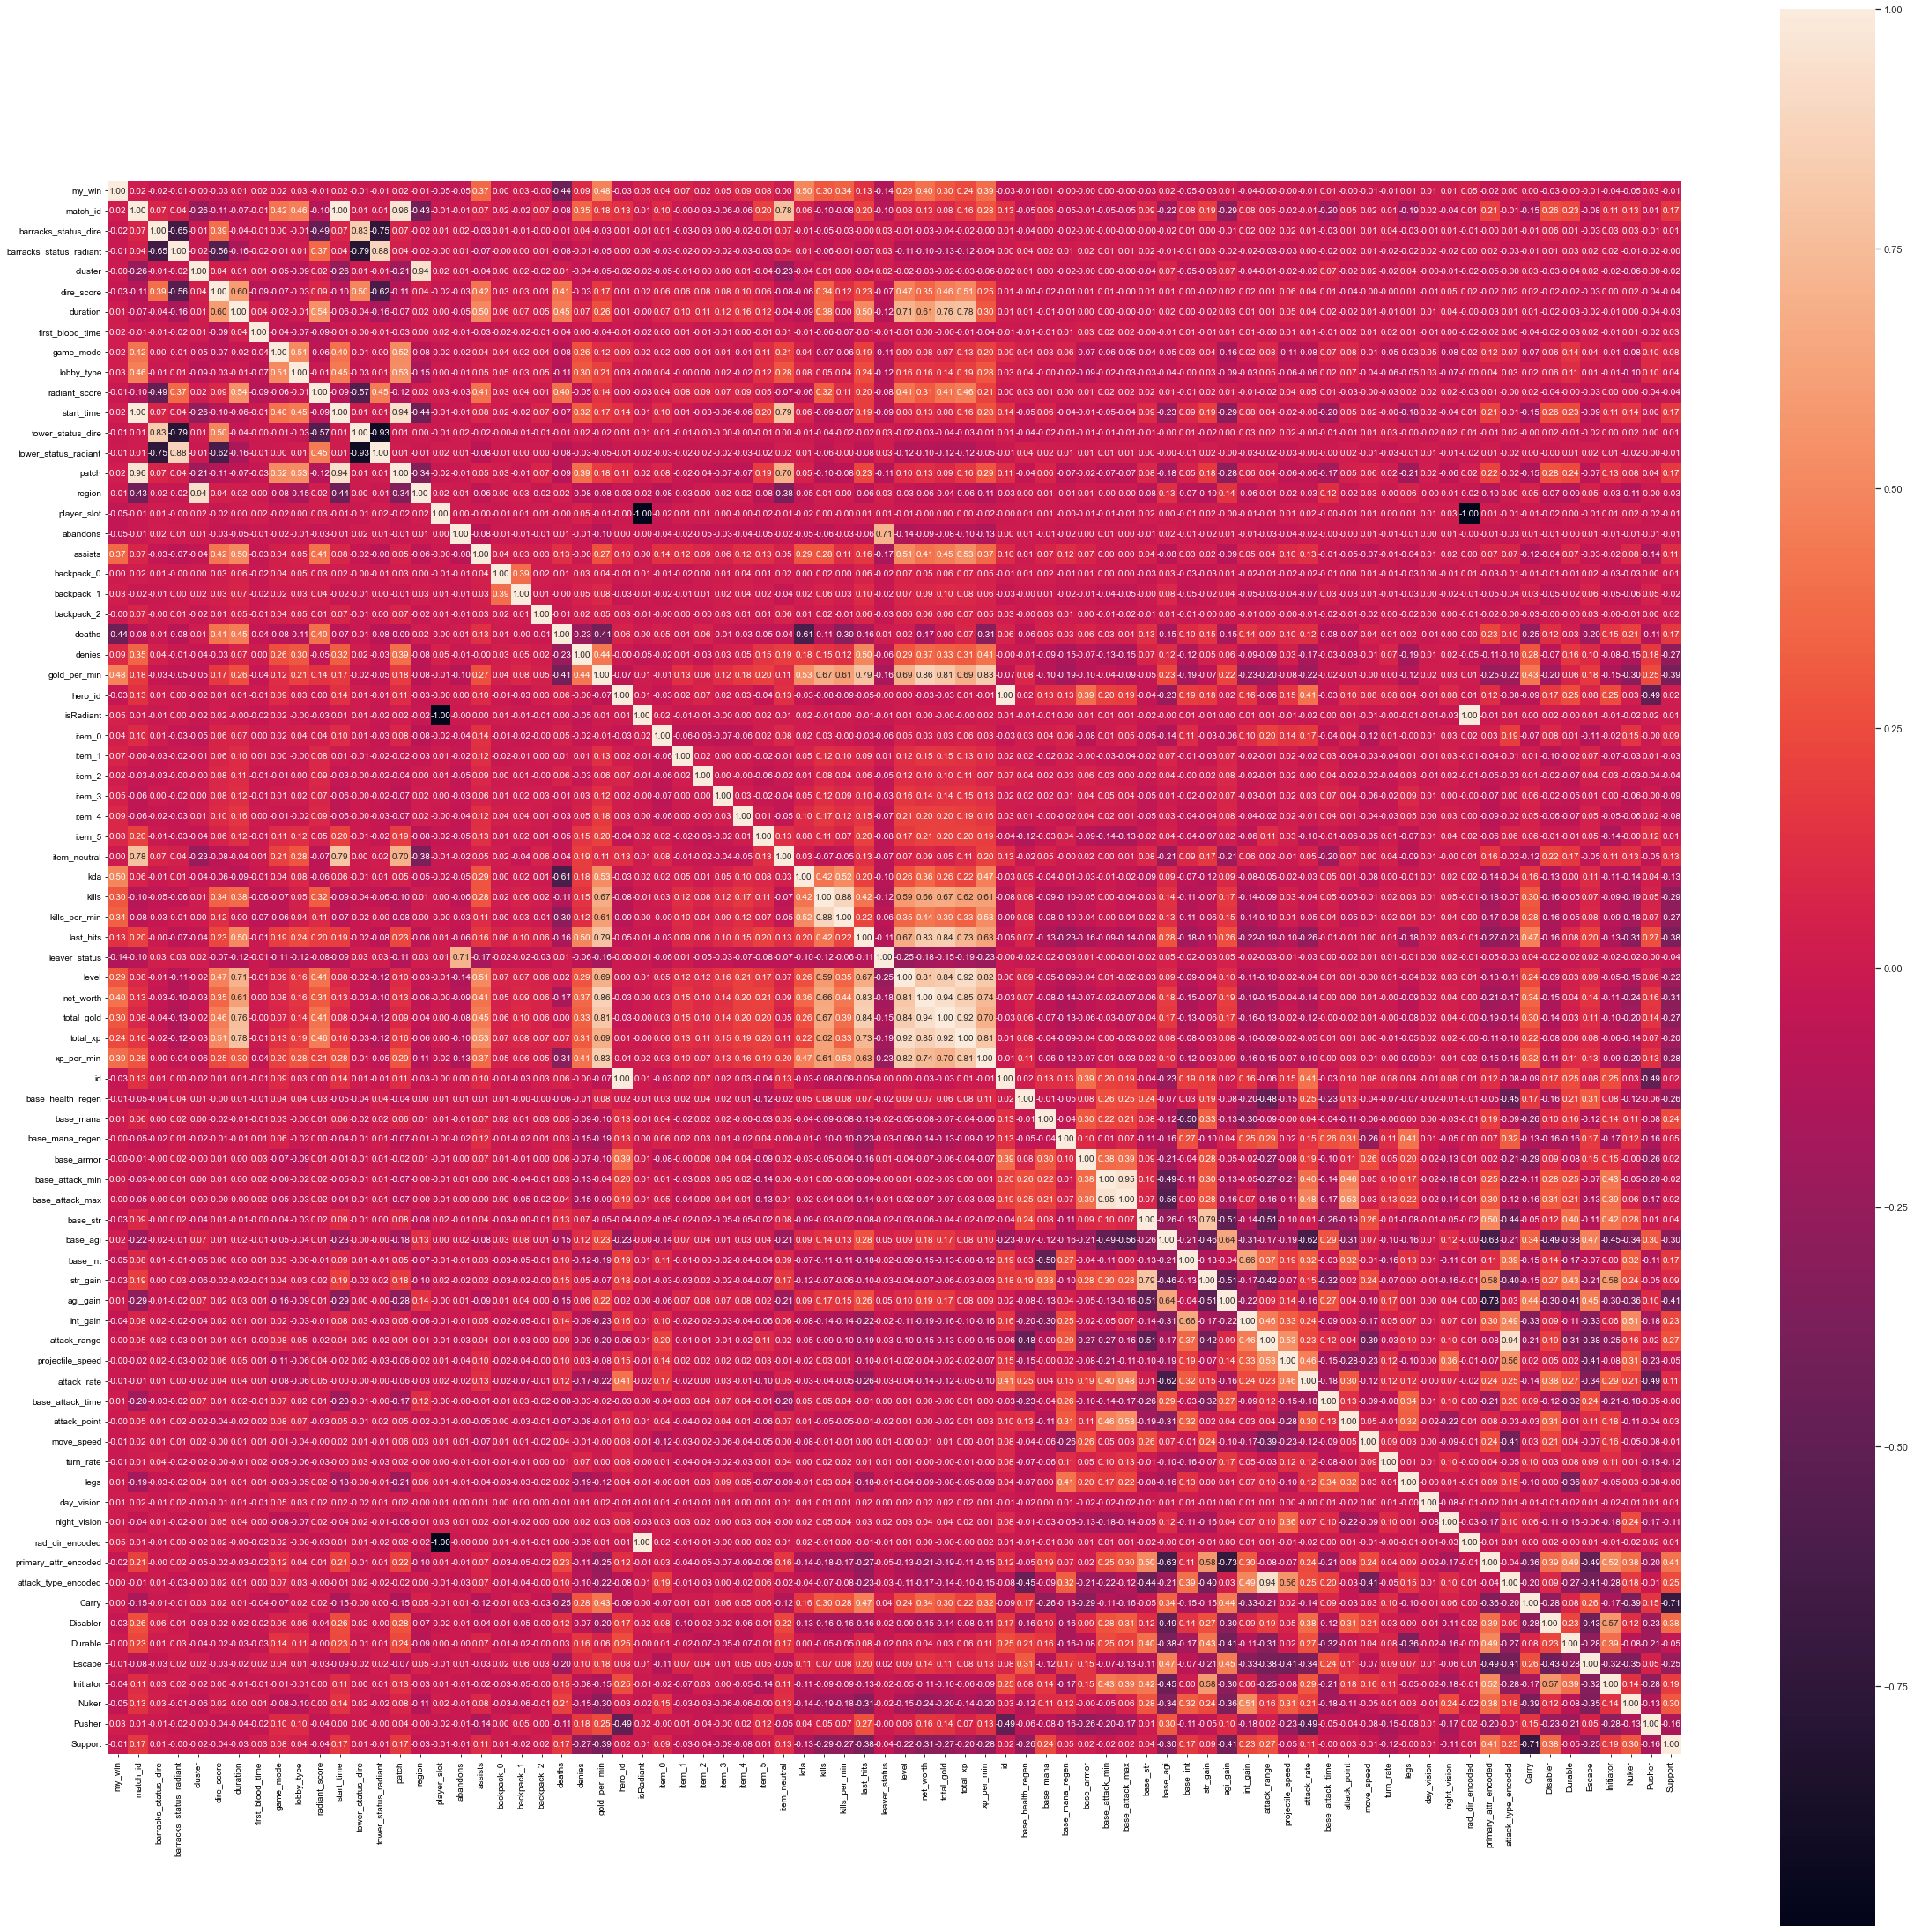

In [71]:
# Need to drop lose column, 100% correlation to target lol

f,ax = plt.subplots(figsize=(40, 40))
cols = data._get_numeric_data().corr()['my_win'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

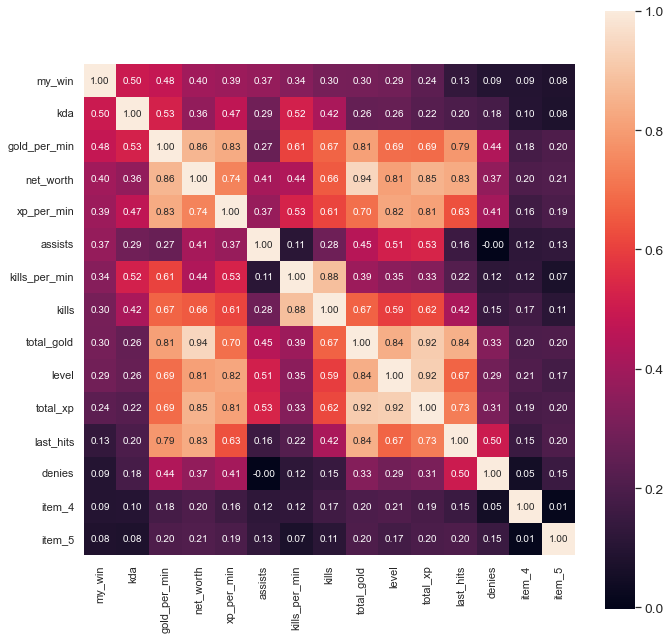

In [72]:
k = 15 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = data._get_numeric_data().corr().nlargest(k, 'my_win')['my_win'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.savefig('heatmap_engineered.png')
plt.show()

In [73]:
data.picks_bans[0]

[{'is_pick': True, 'hero_id': 14, 'team': 0, 'order': 0},
 {'is_pick': True, 'hero_id': 83, 'team': 1, 'order': 1},
 {'is_pick': True, 'hero_id': 27, 'team': 1, 'order': 2},
 {'is_pick': True, 'hero_id': 102, 'team': 0, 'order': 3},
 {'is_pick': True, 'hero_id': 94, 'team': 1, 'order': 4},
 {'is_pick': True, 'hero_id': 85, 'team': 0, 'order': 5},
 {'is_pick': True, 'hero_id': 37, 'team': 0, 'order': 6},
 {'is_pick': True, 'hero_id': 23, 'team': 1, 'order': 7},
 {'is_pick': True, 'hero_id': 63, 'team': 0, 'order': 8},
 {'is_pick': True, 'hero_id': 138, 'team': 1, 'order': 9},
 {'is_pick': False, 'hero_id': 111, 'team': 0, 'order': 10},
 {'is_pick': False, 'hero_id': 32, 'team': 0, 'order': 11},
 {'is_pick': False, 'hero_id': 75, 'team': 0, 'order': 12},
 {'is_pick': False, 'hero_id': 94, 'team': 0, 'order': 13},
 {'is_pick': False, 'hero_id': 12, 'team': 0, 'order': 14},
 {'is_pick': False, 'hero_id': 2, 'team': 1, 'order': 15},
 {'is_pick': False, 'hero_id': 34, 'team': 1, 'order': 16}

In [74]:
data.picks_bans.str.len().value_counts()

2.00     756
14.00    679
15.00    561
13.00    546
1.00     427
3.00     397
16.00    325
12.00    284
17.00    171
11.00    100
18.00     56
4.00      53
19.00      9
10.00      6
22.00      4
5.00       3
21.00      2
9.00       1
24.00      1
Name: picks_bans, dtype: int64

In [75]:
data[data.picks_bans.str.len() == 24].reset_index().picks_bans[0]

[{'is_pick': False, 'hero_id': 57, 'team': 0, 'order': 0},
 {'is_pick': False, 'hero_id': 14, 'team': 1, 'order': 1},
 {'is_pick': False, 'hero_id': 98, 'team': 0, 'order': 2},
 {'is_pick': False, 'hero_id': 30, 'team': 1, 'order': 3},
 {'is_pick': True, 'hero_id': 26, 'team': 0, 'order': 4},
 {'is_pick': True, 'hero_id': 51, 'team': 1, 'order': 5},
 {'is_pick': True, 'hero_id': 47, 'team': 1, 'order': 6},
 {'is_pick': True, 'hero_id': 25, 'team': 0, 'order': 7},
 {'is_pick': False, 'hero_id': 52, 'team': 0, 'order': 8},
 {'is_pick': False, 'hero_id': 5, 'team': 1, 'order': 9},
 {'is_pick': False, 'hero_id': 8, 'team': 0, 'order': 10},
 {'is_pick': False, 'hero_id': 21, 'team': 1, 'order': 11},
 {'is_pick': False, 'hero_id': 29, 'team': 0, 'order': 12},
 {'is_pick': False, 'hero_id': 36, 'team': 1, 'order': 13},
 {'is_pick': True, 'hero_id': 64, 'team': 1, 'order': 14},
 {'is_pick': True, 'hero_id': 136, 'team': 0, 'order': 15},
 {'is_pick': True, 'hero_id': 37, 'team': 0, 'order': 16}

In [76]:
data.to_pickle('cleaned_data.pkl')